# Importing Libraries

In [1]:
# import sys
# !{sys.executable} -m pip install -U scikit-learn

In [2]:
""" Cloud Computing Project
    Group-5
    Names- Sara Sanchez, Atharva , Osemekhian Ehilen
"""
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn import tree
#from sklearn.tree import export_graphviz
import os
#from pydotplus import graph_from_dot_data
from sklearn.ensemble import VotingRegressor
import webbrowser
import boto3
import botocore

# --
#pd.set_option("display.max_columns", None)  # show all cols

# --

# **Connection to S3 using Boto3**

In [3]:
bucket_name='edu.gwu.ds.cc.g21275897'
key= 'Admission_Predict.csv'
s3= boto3.resource('s3')
s3.Bucket(bucket_name).download_file(key, 'Admission_Predict.csv')

# **Reading Dataset from S3**

In [4]:
# Reading dataset
per = pd.read_csv("Admission_Predict.csv")
per_new = per.copy(deep=True)  # DF copy
target= "Chance of Admit"
random_seed=42
per.head() #display first 5 rows

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
per.describe() #display basic statistics of features

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [6]:

# cleaning column names
per_new.rename(columns={'Chance of Admit ': 'Chance of Admit', 'LOR ': 'LOR'}, inplace=True)
per_new['University Rating'] = per_new['University Rating'].astype('category')
per_new['Research'] = per_new['Research'].astype('category')

# per_new=per[(per.iloc[:,-1]>=0.01)&(per.iloc[:,-1]<=1)] #Chance of Admission
# per_new=per[(per.iloc[:,1]>=1)&(per.iloc[:,1]<=340)] #GRE
# per_new=per[(per.iloc[:,2]>=1)&(per.iloc[:,2]<=120)] #TOEFL
# per_new=per[(per.iloc[:,3]>=1)&(per.iloc[:,3]<=5)] #URating
# per_new=per[(per.iloc[:,4]>=1)&(per.iloc[:,4]<=5)] #SOP
# per_new=per[(per.iloc[:,5]>=1)&(per.iloc[:,5]<=5)] #LOR
# per_new=per[(per.iloc[:,6]>=1)&(per.iloc[:,6]<=10)] #CGPA
# per_new=per[(per.iloc[:,7]>=0)&(per.iloc[:,7]<=1)] #Research

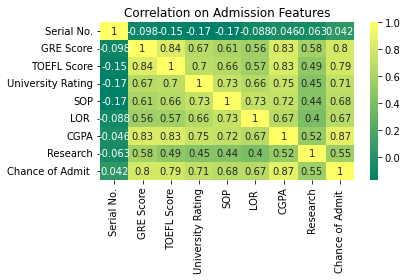

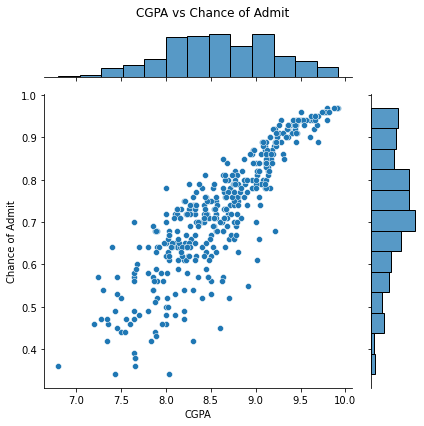

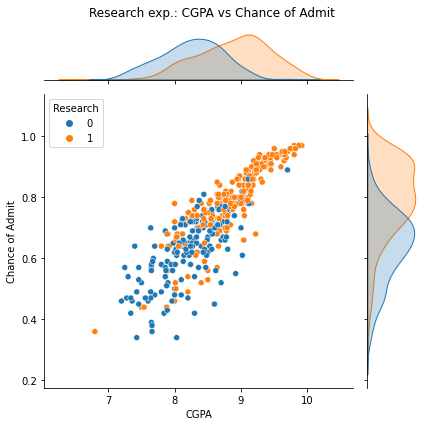

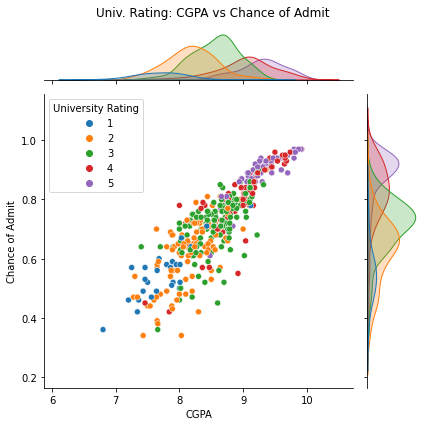

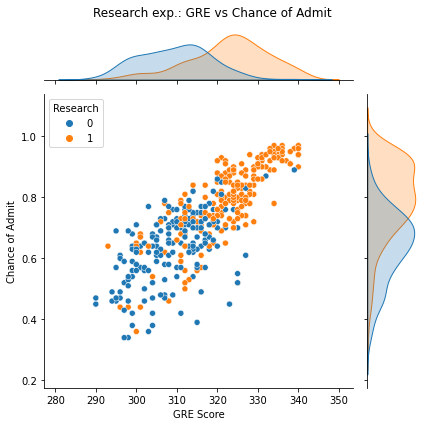

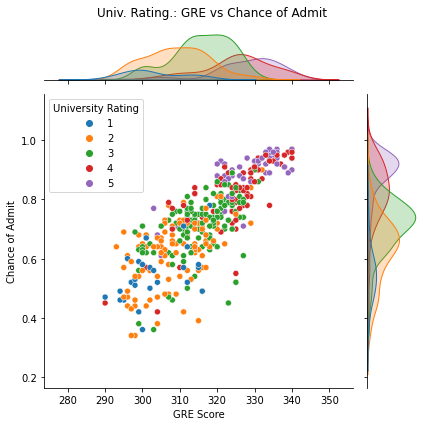

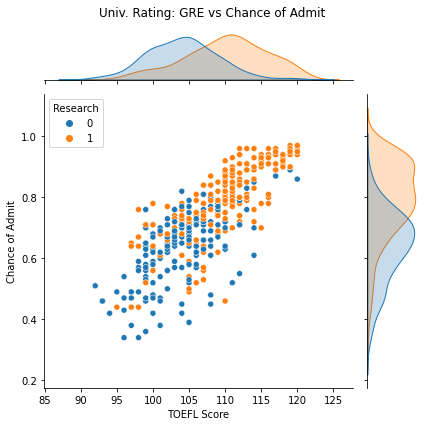

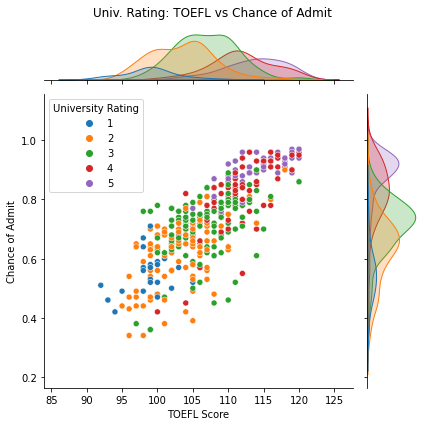

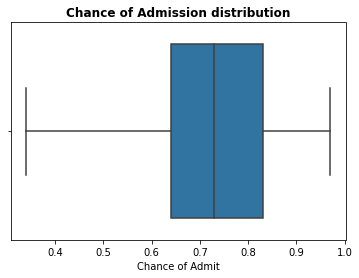

In [7]:
#--------------------------------------EDA----------------------------------------------------
# Visualization
sns.heatmap(per.corr(), annot=True, cmap='summer')
plt.title("Correlation on Admission Features")
plt.tight_layout()
plt.show()
# ---------

#1
p=sns.jointplot(x=per_new['CGPA'], y=per_new['Chance of Admit']);
p.fig.suptitle("CGPA vs Chance of Admit")
p.fig.subplots_adjust(top=0.95) # Reduce plot to make room
p.fig.tight_layout()
plt.show()

#2
q=sns.jointplot(x=per_new['CGPA'], y=per_new['Chance of Admit'], hue=per_new['Research']);
q.fig.suptitle("Research exp.: CGPA vs Chance of Admit")
q.fig.subplots_adjust(top=0.95) # Reduce plot to make room
q.fig.tight_layout()
plt.show()

#3
r=sns.jointplot(x=per_new['CGPA'], y=per_new['Chance of Admit'], hue=per_new['University Rating']);
r.fig.suptitle("Univ. Rating: CGPA vs Chance of Admit")
r.fig.subplots_adjust(top=0.95) # Reduce plot to make room
r.fig.tight_layout()
plt.show()

#4
s=sns.jointplot(x=per_new['GRE Score'], y=per_new['Chance of Admit'], hue=per_new['Research']);
s.fig.suptitle("Research exp.: GRE vs Chance of Admit")
s.fig.subplots_adjust(top=0.95) # Reduce plot to make room
s.fig.tight_layout()
plt.show()

#5
t=sns.jointplot(x=per_new['GRE Score'], y=per_new['Chance of Admit'], hue=per_new['University Rating']);
t.fig.suptitle("Univ. Rating.: GRE vs Chance of Admit")
t.fig.subplots_adjust(top=0.95) # Reduce plot to make room
t.fig.tight_layout()
plt.show()

#6
u=sns.jointplot(x=per_new['TOEFL Score'], y=per_new['Chance of Admit'], hue=per_new['Research']);
u.fig.suptitle("Univ. Rating: GRE vs Chance of Admit")
u.fig.subplots_adjust(top=0.95) # Reduce plot to make room
u.fig.tight_layout()
plt.show()

#7
v=sns.jointplot(x=per_new['TOEFL Score'], y=per_new['Chance of Admit'], hue=per_new['University Rating']);
v.fig.suptitle("Univ. Rating: TOEFL vs Chance of Admit")
v.fig.subplots_adjust(top=0.95) # Reduce plot to make room
v.fig.tight_layout()
plt.show()

#8
a=sns.boxplot(x=per_new['Chance of Admit'], whis=np.inf);
a.set_title('Chance of Admission distribution', fontweight='bold')
plt.show()
# --As CGPA and GRE increases, chance of admission increases also.

In [8]:
# ----------------------------------Preprocessing---------------------------------------------

# Data splitting
# Divide the data into training (70%) and test (30%)
df_train, df_test = train_test_split(per_new,train_size=0.6,random_state=random_seed)

# Divide the test data into validation (50%) and test (50%)
df_val, df_test = train_test_split(df_test, train_size=0.5, random_state=random_seed)

# Reset the index
df_train, df_val, df_test = df_train.reset_index(drop=True), df_val.reset_index(drop=True), df_test.reset_index(drop=True)

# check for uncommon feature
df_common_var = pd.DataFrame(
    np.intersect1d(np.intersect1d(df_train.columns, df_val.columns), np.union1d(df_test.columns, [target])),
    columns=['common var'])
df_common_var

,common var
0,CGPA
1,Chance of Admit
2,GRE Score
3,LOR
4,Research
5,SOP
6,Serial No.
7,TOEFL Score
8,University Rating


In [9]:

#Get columns in left not in right
uncommon_train= np.setdiff1d(df_train.columns,df_common_var['common var'])
uncommon_val= np.setdiff1d(df_val.columns,df_common_var['common var'])
uncommon_test= np.setdiff1d(df_test.columns,df_common_var['common var'])
#Dropping uncommon columns
df_train.drop(columns=uncommon_train,inplace=True)
df_val.drop(columns=uncommon_val,inplace=True)
df_test.drop(columns=uncommon_test,inplace=True)
print(f'Train, validition & Test has same amount of columns?: {len(df_train.columns)==len(df_val.columns)==len(df_test.columns)}')

# Combine df_train, df_val and df_test
df = pd.concat([df_train, df_val, df_test], sort=False)

# Handling Identifiers
df_id = df[[var for var in df.columns
            # If the data type is not dtype
            if (df[var].dtype != "float"
                # If the value is unique for each sample
                and df[var].nunique(dropna=True) == df[var].notnull().sum())]]
print(df_id.head())
# Remove identifiers from df_train
df_train.drop(columns=np.intersect1d(df_id.columns, df_train.columns), inplace=True)
# Remove identifiers from df_val
df_val.drop(columns=np.intersect1d(df_id.columns, df_val.columns), inplace=True)
# Remove identifiers from df_test
df_test.drop(columns=np.intersect1d(df_id.columns, df_test.columns), inplace=True)

#Check for missing values
print(f'Are there missing values in train ?: {df_train.isna().sum().any()}')
print(f'Are there missing values in validation ?: {df_val.isna().sum().any()}')
print(f'Are there missing values in test ?: {df_test.isna().sum().any()}')

Train, validition & Test has same amount of columns?: True
   Serial No.
0         376
1         209
2         287
3         169
4         354
Are there missing values in train ?: False
Are there missing values in validation ?: False
Are there missing values in test ?: False


In [10]:

# Splitting feature and Target
# Get the feature matrix
X_train = df_train[np.setdiff1d(df_train.columns, [target])].values
X_val = df_val[np.setdiff1d(df_val.columns, [target])].values
X_test = df_test[np.setdiff1d(df_test.columns, [target])].values

# Get the target vector
y_train = df_train[target].values
y_val = df_val[target].values
y_test= df_test[target].values

# Scaling the Data
from sklearn.preprocessing import StandardScaler

sc= StandardScaler()

# Standardize the training, val & test feature data
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)
X_test = sc.transform(X_test)

# Standardize the training, val  target data
y_train = sc.fit_transform(y_train.reshape(-1, 1)).reshape(-1)
y_val = sc.transform(y_val.reshape(-1, 1)).reshape(-1)

In [11]:

# Hyperparameter Tuning
from sklearn.model_selection import PredefinedSplit

def get_train_val_ps(X_train, y_train, X_val, y_val):
    """
    Get the:
    feature matrix and target vector in the combined training and validation data
    target vector in the combined training and validation data
    PredefinedSplit

    Parameters
    ----------
    X_train : the feature matrix in the training data
    y_train : the target vector in the training data
    X_val : the feature matrix in the validation data
    y_val : the target vector in the validation data

    Return
    ----------
    The feature matrix in the combined training and validation data
    The target vector in the combined training and validation data
    PredefinedSplit
    """

    # Combine the feature matrix in the training and validation data
    X_train_val = np.vstack((X_train, X_val))

    # Combine the target vector in the training and validation data
    y_train_val = np.vstack((y_train.reshape(-1, 1), y_val.reshape(-1, 1))).reshape(-1)

    # Get the indices of training and validation data
    train_val_idxs = np.append(np.full(X_train.shape[0], -1), np.full(X_val.shape[0], 0))

    # The PredefinedSplit
    ps = PredefinedSplit(train_val_idxs)

    return X_train_val, y_train_val, ps

# Getting predefined split cross-validator
X_train_val, y_train_val, ps = get_train_val_ps(X_train, y_train, X_val, y_val)

# Implementing several Regression Models
models= {'RF':RandomForestRegressor(random_state=random_seed),
         'LR':LinearRegression()}

from sklearn.pipeline import Pipeline
pipes = {}

for acronym, model in models.items():
  pipes[acronym] = Pipeline([('model',model)])
param_dists = {}
# FOR RandomForestClassifier
# The distribution for n_estimator,: a uniform distribution over [loc, loc + scale]

min_samples_split= [2,20,100]
min_samples_leaf= [1,20,100]
fit_intercept=[True,False]
# Update param_dists
param_dists['RF'] = [{'model__min_samples_split': min_samples_split,
                       'model__min_samples_leaf': min_samples_leaf}]
param_dists['LR']= [{'model__fit_intercept':fit_intercept}]
#============
import os
from sklearn.model_selection import RandomizedSearchCV

# The list of [best_score_, best_params_, best_estimator_] obtained by RandomizedSearchCV
best_score_params_estimator_rs = []

for acronym in pipes.keys():
    # RandomizedSearchCV
    rs = RandomizedSearchCV(estimator=pipes[acronym],
                            param_distributions=param_dists[acronym],
                            n_iter=4,
                            scoring='neg_mean_squared_error',
                            n_jobs=2,
                            cv=ps,
                            random_state=random_seed,
                            return_train_score=True)

    # Fit the pipeline
    rs = rs.fit(X_train_val, y_train_val)

    # Update best_score_param_estimators
    best_score_params_estimator_rs.append([rs.best_score_, rs.best_params_, rs.best_estimator_])

    # Sort cv_results in ascending order of 'rank_test_score' and 'std_test_score'
    cv_results = pd.DataFrame.from_dict(rs.cv_results_).sort_values(by=['rank_test_score', 'std_test_score'])

    # Get the important columns in cv_results
    important_columns = ['rank_test_score',
                         'mean_test_score',
                         'std_test_score',
                         'mean_train_score',
                         'std_train_score',
                         'mean_fit_time',
                         'std_fit_time',
                         'mean_score_time',
                         'std_score_time']

    # Move the important columns ahead
    cv_results = cv_results[important_columns + sorted(list(set(cv_results.columns) - set(important_columns)))]

    # Write cv_results file
    path=os.getcwd()
    cv_results.to_csv(path_or_buf=path + acronym +'.csv',index=False)

# Sort best_score_params_estimator_rs in descending order of the best_score_
best_score_params_estimator_rs = sorted(best_score_params_estimator_rs, key=lambda x: x[0], reverse=True)

# Print best_score_params_estimator_rs
rez=pd.DataFrame(best_score_params_estimator_rs, columns=['best_score', 'best_param', 'best_estimator'])
print(rez)

   best_score                                         best_param  \
0   -0.231758                    {'model__fit_intercept': False}   
1   -0.231812  {'model__min_samples_split': 2, 'model__min_sa...   

                                      best_estimator  
0            (LinearRegression(fit_intercept=False))  
1  ((DecisionTreeRegressor(max_features='auto', r...  


/home/ec2-user/ec2_assignement/venv/lib64/python3.7/site-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 2 is smaller than n_iter=4. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


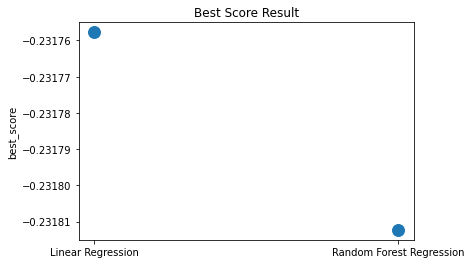

In [12]:

# Linear Regression gives the best score with negative MSE closer to zero than Random Forest Regression

sns.scatterplot(x=['Linear Regression','Random Forest Regression'], y=rez['best_score'],s=200)
plt.title('Best Score Result')
plt.savefig('Best Regressor.pdf')
plt.show()

In [13]:

best_score_rs, best_params_rs, best_estimator_rs = best_score_params_estimator_rs[0]

# Get the prediction on the testing data using best_model
y_test_pred = best_estimator_rs.predict(X_test)
y_test_pred= pd.DataFrame(sc.inverse_transform(y_test_pred.reshape(-1,1)),columns=[target])
test_score= mean_squared_error(df_test[target],y_test_pred[target])
print(f'Test MSE: {test_score}')

Test MSE: 0.004790186774649025


In [14]:

from sklearn.metrics import r2_score
r2=r2_score(df_test[target], y_test_pred[target])
ar2=1-((1-r2)*(len(df_test)-1)/(len(df_test)-7-1))
print(f' R Squared {r2}')
print(f'Adjusted R Squared {ar2}')

 R Squared 0.7333876402842929
Adjusted R Squared 0.7074669942008214


In [15]:

# Feature Importance
# Get the best_score, best_param and best_estimator of random forest obtained by RandomSearchCV
best_score_rfc, best_param_rfc, best_estimator_rfc = best_score_params_estimator_rs[1]

# Get the dataframe of feature and importance
df_fi_rf = pd.DataFrame(np.hstack((np.setdiff1d(df_train.columns, [target]).reshape(-1, 1), best_estimator_rfc.named_steps['model'].feature_importances_.reshape(-1, 1))),
                         columns=['Features', 'Importance'])

# Sort df_fi_rfc in descending order of the importance
df_fi_rf = df_fi_rf.sort_values(ascending=False, by='Importance').reset_index(drop=True)

# Print the feature importance 
df_fi_rf.head(7)


,Features,Importance
0,CGPA,0.779471
1,GRE Score,0.115547
2,SOP,0.030358
3,TOEFL Score,0.028713
4,LOR,0.018628
5,University Rating,0.014988
6,Research,0.012294


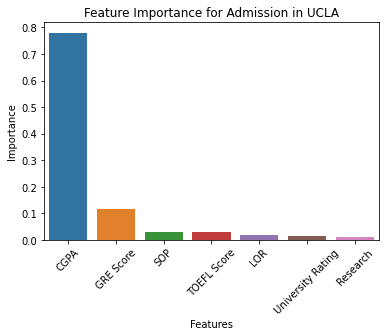

In [16]:
#Print the feature importance plot
sns.barplot(x='Features',y='Importance',data=df_fi_rf)
plt.xticks(rotation=45)
plt.title('Feature Importance for Admission in UCLA')
plt.savefig('feature importance for UCLA Admission.pdf')
plt.show()
#==============

In [17]:
# Saving Model
import pickle
with open('best_estimator_rs.pickle','wb') as f:
    pickle.dump(best_estimator_rs, f)

# Into S3 bucket
s3_client = boto3.client('s3')
response = s3_client.upload_file('best_estimator_rs.pickle', bucket_name, 'best_estimator_rs.pickle')



In [18]:
# Loading saved Model from S3 Bucket
key2= 'best_estimator_rs.pickle'
s3.Bucket(bucket_name).download_file(key2, key2)

# loading it
with open('best_estimator_rs.pickle', 'rb') as f:
    model= pickle.load(f)


In [19]:
# Testing model with High/Medium/Low inputs
check= pd.DataFrame([], columns=df_test.drop(columns=['Chance of Admit']).columns)
check.loc['Student1']= [340,120,5,5.0,5.0,10.0,1]
check.loc['Student2']= [170,60,2,2.5,2.5,5.0,1]
check.loc['Student3']= [20,30,1,1.5,1.5,2.5,0]
check.loc['Dummy']= [1,1,1,1.0,1.0,1.0,0]
check.iloc[:,2]=check.iloc[:,2].astype('category')
check.iloc[:,6]=check.iloc[:,6].astype('category')
check.iloc[:,0]=check.iloc[:,0].astype('int')
check.iloc[:,1]=check.iloc[:,1].astype('int')

sc_n= StandardScaler()
scaled= sc_n.fit_transform(check.values)
predicted= model.predict(scaled)
check['Chance of Admission']= sc.inverse_transform(predicted.reshape(-1,1))
check.to_csv('check.csv')
check

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admission
Student1,340,120,5.0,5.0,5.0,10.0,1.0,0.952708
Student2,170,60,2.0,2.5,2.5,5.0,1.0,0.758571
Student3,20,30,1.0,1.5,1.5,2.5,0.0,0.621444
Dummy,1,1,1.0,1.0,1.0,1.0,0.0,0.586778


In [21]:

# save Best_Regressor| Feature_Importance | check to s3 bucket

#import pickle
# Best regressor
# Into S3 bucket
s3 = boto3.resource('s3')
s3.Bucket(bucket_name).upload_file("Best Regressor.pdf", "cloudC/Best Regressor.pdf", ExtraArgs={'ACL':'public-read'})

# Feature Importance
# Into S3 bucket
s3.Bucket(bucket_name).upload_file("feature importance for UCLA Admission.pdf", "cloudC/feature importance for UCLA Admission.pdf", ExtraArgs={'ACL':'public-read'})

# check.csv
# Into S3 bucket
s3.Bucket(bucket_name).upload_file("check.csv", "cloudC/check.csv", ExtraArgs={'ACL':'public-read'})